
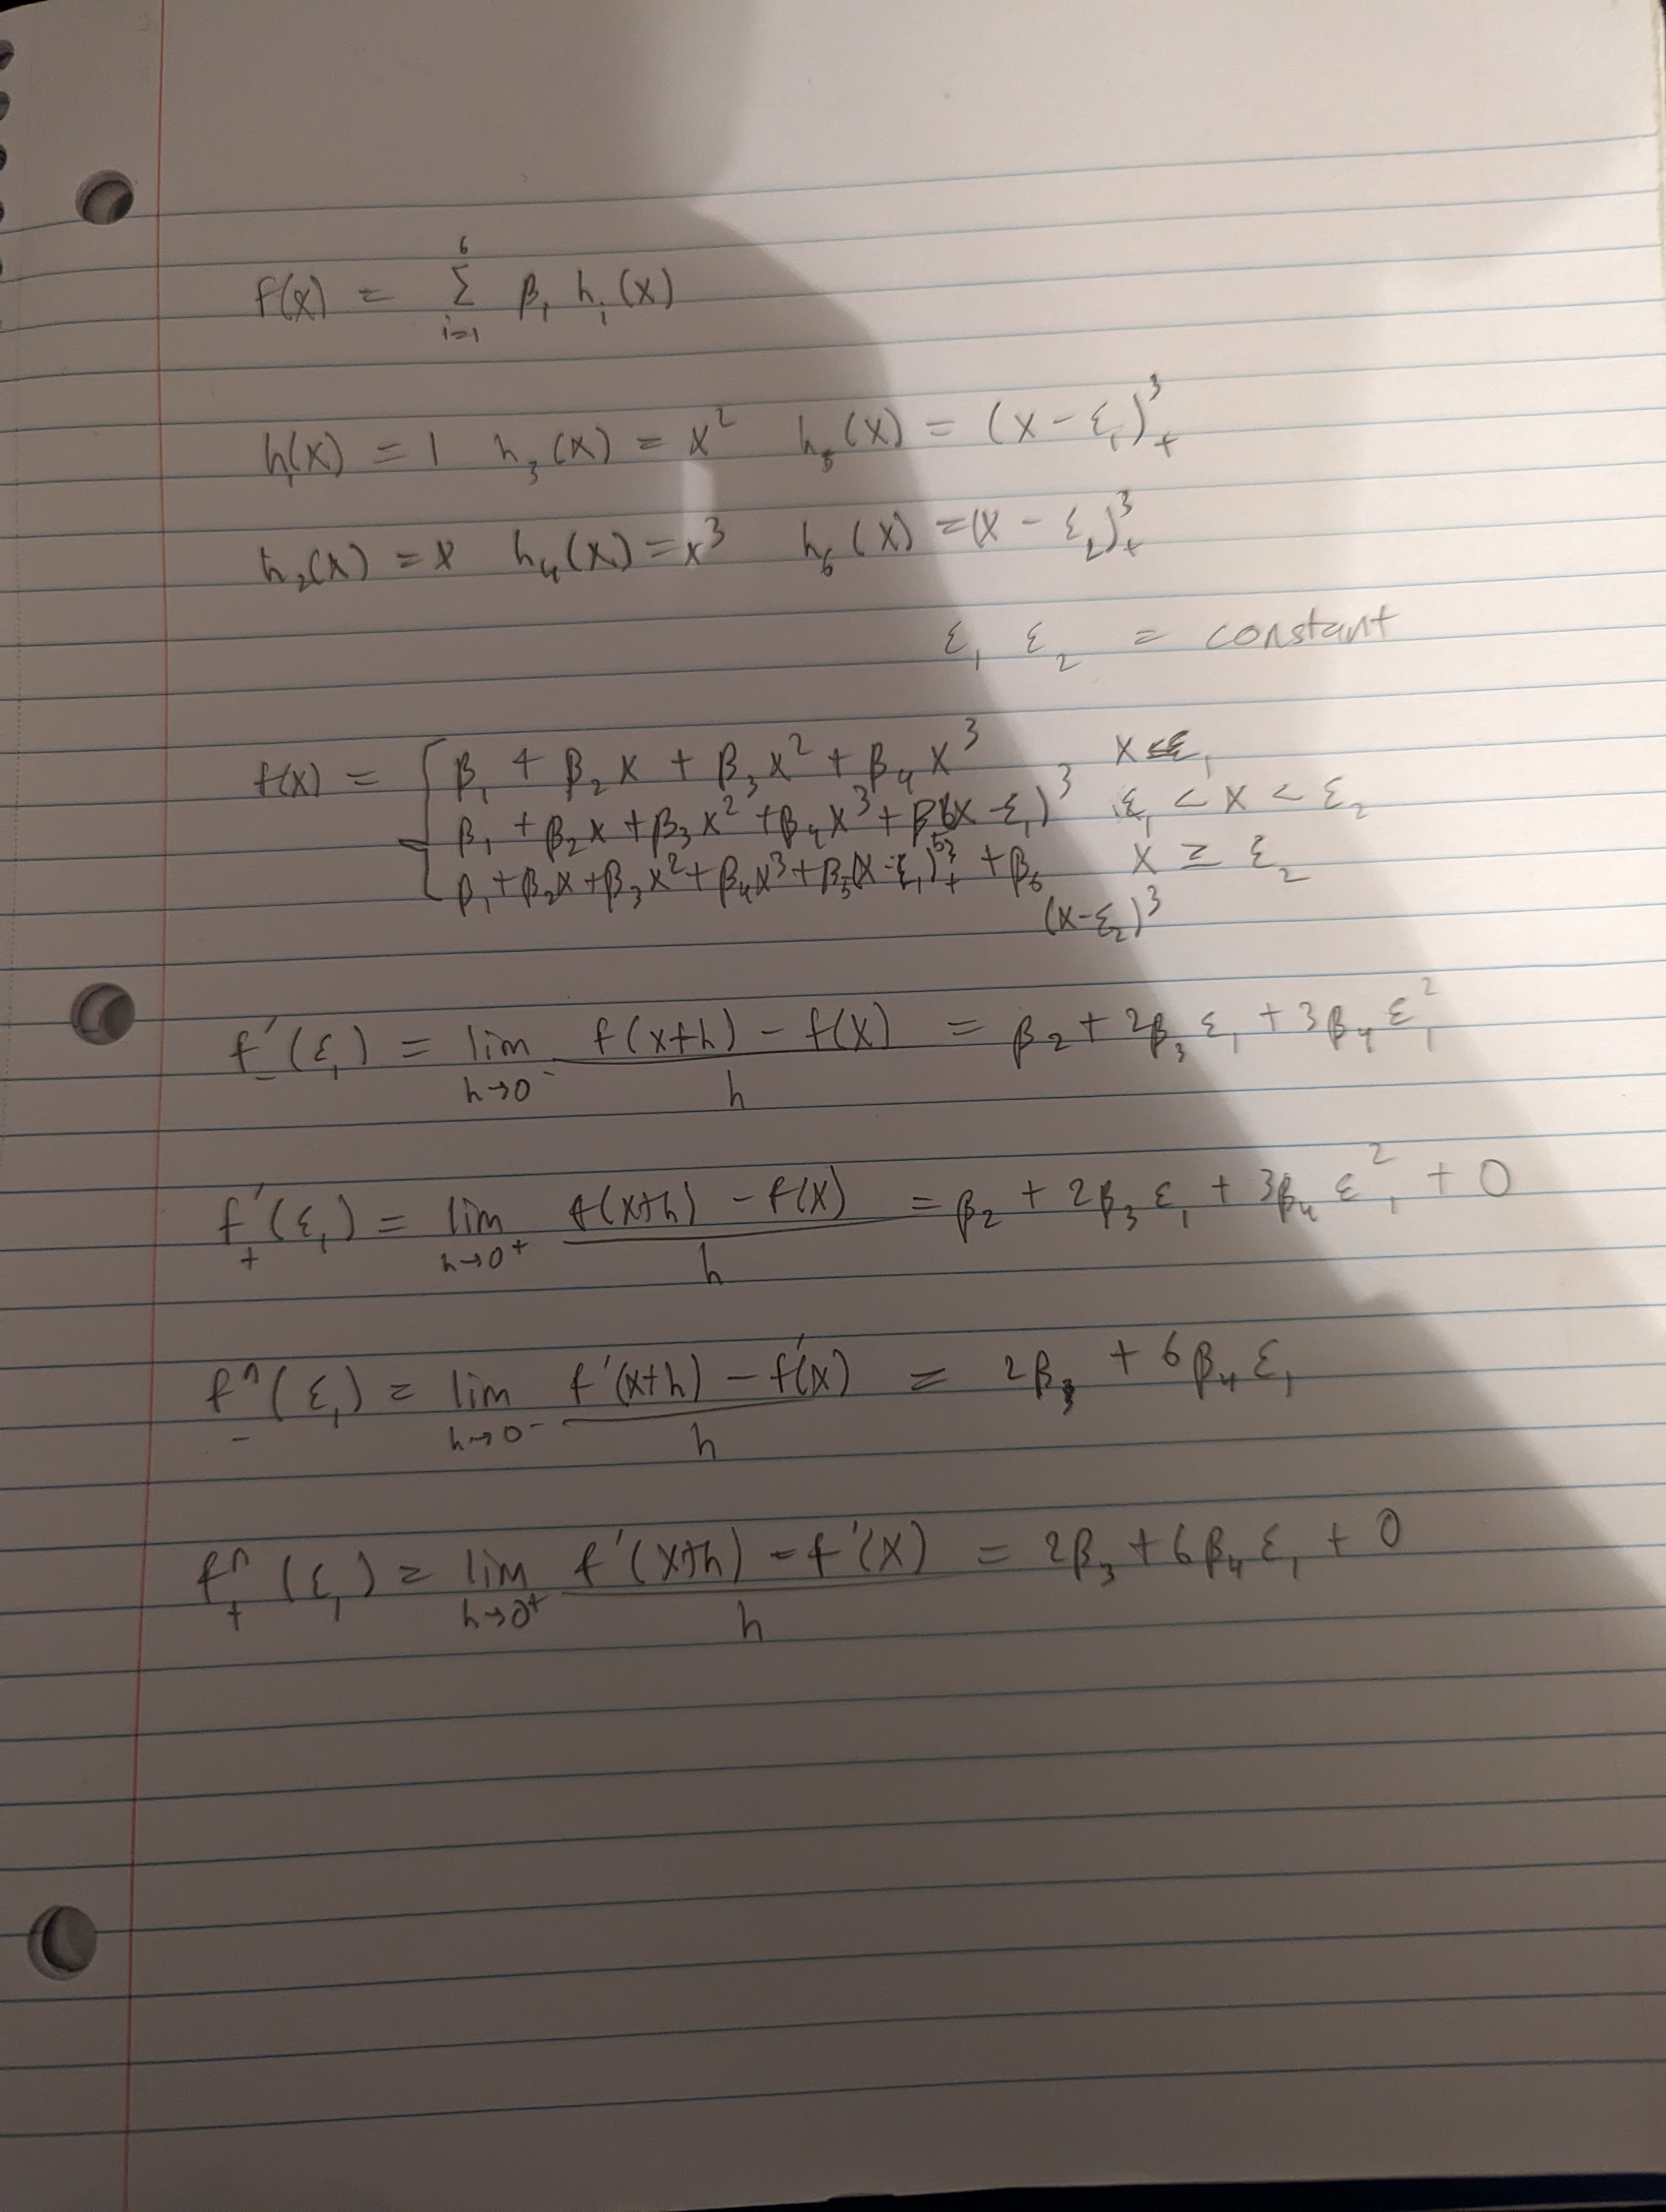

In [63]:
import base64
from IPython.display import HTML

with open("./HW2.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
    
display(HTML(f'<img src="data:image/png;base64,{encoded_string}"/>'))

In [56]:
import pandas as pd

# Load the dataset
file_path = './AirQualityUCI.csv'  
air_quality_df = pd.read_csv(file_path, delimiter=';', decimal=',', na_values=-200)

# Remove columns and rows with all NaN values
air_quality_df.dropna(axis=1, how='all', inplace=True)
air_quality_df.dropna(axis=0, how='any', inplace=True)

# Combine date and time into a single datetime column and set as index
air_quality_df['DateTime'] = pd.to_datetime(air_quality_df['Date'] + ' ' + air_quality_df['Time'], format='%d/%m/%Y %H.%M.%S')

# Set DateTime as the index 
air_quality_df.set_index('DateTime', inplace=True)
air_quality_df.drop(columns=['Date', 'Time'], inplace=True)

# Interpolate missing values
air_quality_df.interpolate(method='linear', inplace=True)

# Resample to daily averages
daily_data = air_quality_df.resample('D').mean()

print(daily_data)

              CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
DateTime                                                                  
2004-03-10  1.966667  1316.500000   86.500000   8.450000     912.333333   
2004-03-11  2.313636  1265.409091  112.500000   8.568182     879.954545   
2004-03-12  2.900000  1309.285714  169.761905  12.666667    1036.476190   
2004-03-13  2.740909  1346.227273  147.272727  11.381818    1010.181818   
2004-03-14  2.472727  1372.409091  119.045455   9.836364     950.590909   
2004-03-15  3.613636  1486.181818  254.136364  17.172727    1176.772727   
2004-03-16  2.863636  1376.454545  206.227273  14.504545    1102.363636   
2004-03-17  3.181818  1404.181818  224.363636  16.418182    1144.363636   
2004-03-18  2.350000  1276.000000  152.750000  12.362500     999.750000   
2004-03-19       NaN          NaN         NaN        NaN            NaN   
2004-03-20       NaN          NaN         NaN        NaN            NaN   
2004-03-21       NaN     

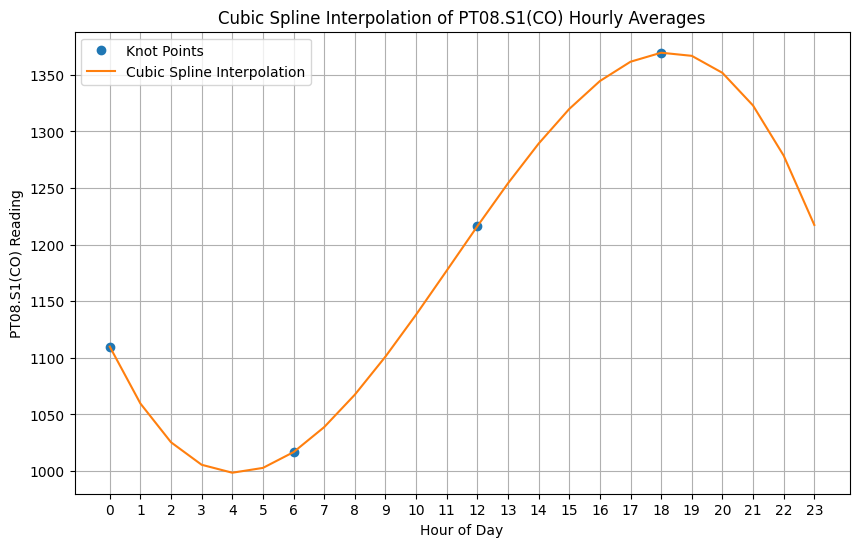

In [57]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Extract just the PT08.S1 column 
air_quality_df['Hour'] = air_quality_df.index.hour
co_hourly_data = air_quality_df[['PT08.S1(CO)', 'Hour']]

# Group by the hour for hourly averages - PT08.S1
hourly_avg_co = co_hourly_data.groupby('Hour')['PT08.S1(CO)'].mean()

# Desired knot hours
desired_knot_hours = [0, 6, 12, 18]

# Select knot points based on the desired hours
actual_knot_hours = []
knot_values = []

for hour in desired_knot_hours:
    # If hour is present in hourly averages
    if hour in hourly_avg_co.index:
        actual_knot_hours.append(hour)
        knot_values.append(hourly_avg_co.loc[hour])
    else:
        # If desired not found find nearest hour
        nearest_hour = hourly_avg_co.index[np.abs(hourly_avg_co.index - hour).argmin()]
        if nearest_hour not in actual_knot_hours:  
            actual_knot_hours.append(nearest_hour)
            knot_values.append(hourly_avg_co.loc[nearest_hour])

if len(actual_knot_hours) >= 2:
    cs = CubicSpline(actual_knot_hours, knot_values)

    # Evaluate the spline for each hour of the day
    hours = np.arange(24)
    spline_values = cs(hours)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(actual_knot_hours, knot_values, 'o', label='Knot Points')
    plt.plot(hours, spline_values, label='Cubic Spline Interpolation')
    plt.title('Cubic Spline Interpolation of PT08.S1(CO) Hourly Averages')
    plt.xlabel('Hour of Day')
    plt.ylabel('PT08.S1(CO) Reading')
    plt.xticks(hours)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Insufficient knot hrs.")

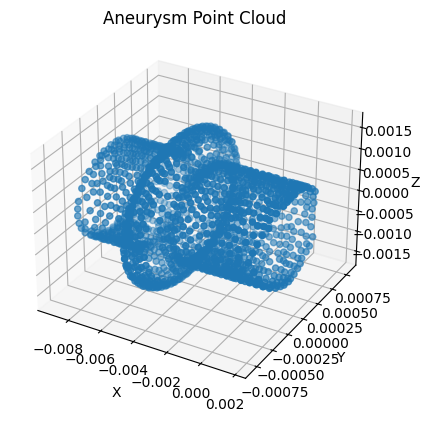

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load 3D point cloud data
data = np.load('./aneurysm.npy') 

x, y, z = data[0, :], data[1, :], data[2, :]
# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_title('Aneurysm Point Cloud')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


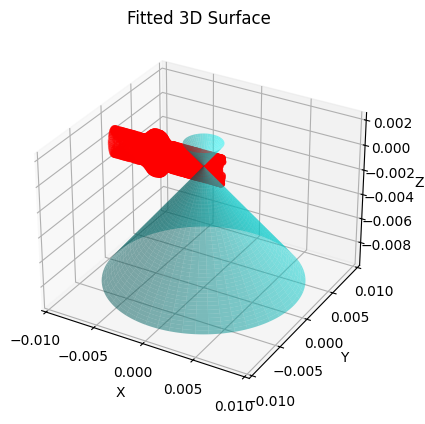

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

x, y, z = data[0, :], data[1, :], data[2, :]

# Define function for the 2D curve, polynomial of degree n
def polynomial_curve(x, *params):
    return sum([p * (x**i) for i, p in enumerate(params)])

# Fit the curve 
initial_guess = [1, 1, 1, 1, 1]
params, _ = curve_fit(polynomial_curve, x, y, p0=initial_guess)

# Generate points for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 400)
y_fit = polynomial_curve(x_fit, *params)

# Revolve curve around Z-axis 
theta = np.linspace(0, 2 * np.pi, 400)
X, Theta = np.meshgrid(x_fit, theta)
Y = polynomial_curve(X, *params)
Z = X.copy() 

# Convert polar to Cartesian coordinates
X3D = X * np.cos(Theta)
Y3D = X * np.sin(Theta)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X3D, Y3D, Z, color='cyan', alpha=0.5)
ax.scatter(x, y, z, color='red') 
ax.set_title('Fitted 3D Surface')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


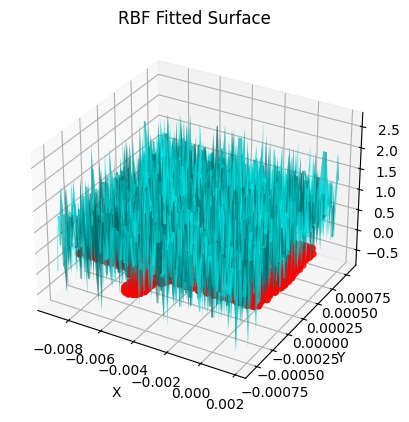

In [60]:
from scipy.interpolate import RBFInterpolator
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z = data

# RBFInterpolator API
rbfi = RBFInterpolator(np.vstack((x, y)).T, z[:, None], kernel='multiquadric', epsilon=2)

# Grid for evaluation
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
Xi, Yi = np.meshgrid(xi, yi)
Zi = rbfi(np.vstack((Xi.flatten(), Yi.flatten())).T)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xi, Yi, Zi.reshape(Xi.shape), color='cyan', alpha=0.5)
ax.scatter(x, y, z, color='red')  
ax.set_title('RBF Fitted Surface')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
